In [6]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from scipy.interpolate import interp1d

In [11]:
def learn_conversion_mental_health_2():
    df = pd.read_csv("/home/groups/swager/rsahoo/brfss_mental_health.csv")
    df["PHQ_4"] = df["ADPLEAS1"] + df["ADDOWN1"] + df["FEELNERV"] + df["STOPWORY"]
    y = df["PHQ_4"].to_numpy().flatten()-4
    X = df["MENTHLTH"].to_numpy().reshape(len(df), 1)
    model = IsotonicRegression().fit(X, y)
    z = np.linspace(min(X), max(X), 1000).reshape(1000, 1)
    w = model.predict(z)
    inv_model = interp1d(z.flatten(), w.flatten(), bounds_error=False, fill_value=(min(w), max(w)))
    return inv_model

In [14]:
df = pd.read_csv("/home/groups/swager/rsahoo/brfss_mental_health.csv")
df["PHQ_4"] = df["ADPLEAS1"] + df["ADDOWN1"] + df["FEELNERV"] + df["STOPWORY"] 

X = df["PHQ_4"].to_numpy().reshape(len(df), 1)-4 
y = df["MENTHLTH"].to_numpy().flatten() 

model = learn_conversion_mental_health_2()
z = np.linspace(0., 30., 1000).reshape(1000, 1)
w = model(z)

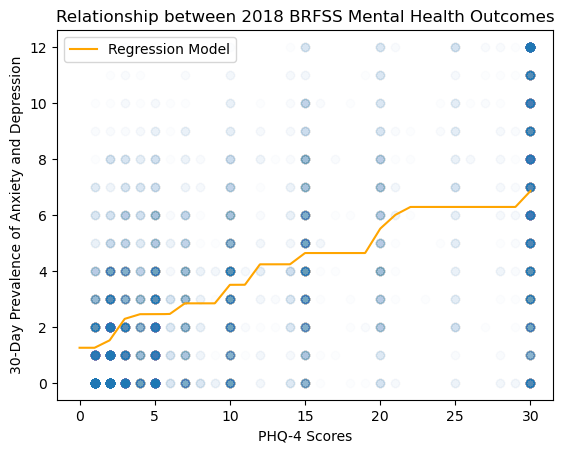

In [18]:
xs = np.linspace(0., 30., 100).reshape(100,1)
plt.scatter(y.flatten(), X.flatten(), alpha=0.01)
plt.plot(z, w, c="orange", label="Regression Model")
plt.xlabel("PHQ-4 Scores")
plt.ylabel("30-Day Prevalence of Anxiety and Depression")
plt.title("Relationship between 2018 BRFSS Mental Health Outcomes")
plt.legend()
plt.savefig("figs/conversion_mental_health_outcomes.pdf", bbox_inches="tight")